# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [59]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from t3_constants import *
from t3_utility import *

In [60]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

x = train_x.values
y = train_y.values.ravel().astype(str)

In [70]:
def cross_validation(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Return validation scores across the k folds of cross-validation."""
    skf = StratifiedKFold(n_splits=n_splits, random_state=0, shuffle=True)
    val_score = []
    for train_index, test_index in skf.split(X, y):
        model.fit(X[train_index], y[train_index].ravel())
        val_score.append(model.score(X[test_index], y[test_index].ravel()))
    return np.array(val_score)

def cross_validation_summary(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Returns validation accuracy score of model (mean and std over all the splits)."""
    val_score = cross_validation(model, X, y, n_splits)
    return val_score.mean(), val_score.std()


In [71]:
## Hyper-parameters grid search for Decision Tree

hyp_dict = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0, 1, 1e-1, 1e-2, 1e-3, 1e-4],
    'min_samples_leaf': [1, 3, 5]
}
combinations = itertools.product(*(hyp_dict[key] for key in sorted(hyp_dict)))

results = []

for criterion, min_impurity_decrease, min_samples_leaf in combinations:
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, x, y, 3)
    res = criterion, min_impurity_decrease, min_samples_leaf, mean_val_score, std_val_score
    results.append(res)

decision_tree_results_df = pd.DataFrame(results, columns=['criterion', 'min_impurity_decrease', 'min_samples_leaf', 'mean_val_score', 'std_val_score'])
decision_tree_results_df.sort_values('mean_val_score')

,criterion,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
22,entropy,1.0000,3,0.447284,0.001957
21,entropy,1.0000,1,0.447284,0.001957
3,gini,1.0000,1,0.447284,0.001957
4,gini,1.0000,3,0.447284,0.001957
5,gini,1.0000,5,0.447284,0.001957
23,entropy,1.0000,5,0.447284,0.001957
6,gini,0.1000,1,0.645458,0.074171
7,gini,0.1000,3,0.645458,0.074171
8,gini,0.1000,5,0.645458,0.074171
24,entropy,0.1000,1,0.717282,0.017456


In [ ]:
decision_tree_results_df.groupby('criterion').mean()

,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
criterion,,,,
entropy,0.185183,3.0,0.733563,0.018469
gini,0.185183,3.0,0.690251,0.019159


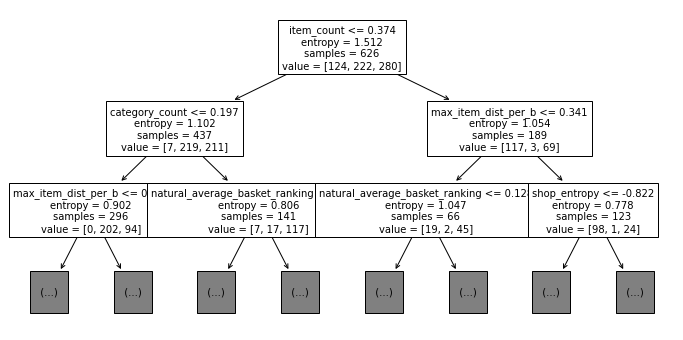

In [80]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01, min_samples_leaf=1, random_state=0)
model.fit(x, y)
plt.figure(figsize=(12, 6))
tree.plot_tree(model, fontsize=10, max_depth=2, feature_names=train_x.columns)
plt.show()

In [81]:
pd.Series(model.feature_importances_, index = train_x.columns).sort_values()

natural_average_price_ranking     0.000000
shop_entropy                      0.018811
avg_baskets_per_d                 0.019427
natural_average_item_ranking      0.019512
max_items_per_b                   0.028782
price_entropy                     0.046037
category_entropy                  0.081666
natural_average_basket_ranking    0.100520
category_count                    0.146803
max_item_dist_per_b               0.157230
item_count                        0.381212
dtype: float64

# Ensembling

In [83]:
def randomized_cv(model, random_grid, n_iter=100):
    """Perform hyper-parameters grid search and return best configuration."""
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = n_iter, cv = 5, verbose=0, random_state=0, n_jobs = -1)

    # Run grid search
    rf_random.fit(x, y)
    mean_acc, std_acc = cross_validation_summary(rf_random.best_estimator_, x, y, 5)

    # Print configuration  and stats about best model
    print(f'{rf_random.best_estimator_}\n mean acc: {mean_acc:.3f}\n std_acc: {std_acc:.3f}')

## Random Forest

In [84]:
# Perform the hyper-parameters grid-search on random forest
random_grid = dict(
    n_estimators = np.logspace(1, 2.5, num=10).astype(int).tolist(),
    max_features = ['sqrt'],
    max_depth = [None] + np.logspace(0.5, 2, num=9).astype(int).tolist(),
    min_samples_split = [2, 5, 10],
    min_samples_leaf = [1, 2, 4],
    bootstrap = [True, False]
)
randomized_cv(
    model=RandomForestClassifier(random_state=0),
    random_grid=random_grid,
    n_iter=1000
)

RandomForestClassifier(max_depth=11, min_samples_split=5, n_estimators=316,
                       random_state=0)
 mean acc: 0.890
 std_acc: 0.034


## Bagging

In [86]:
# Perform the hyper-parameters grid-search on decision tree ensamble (bagging)
hyp_dict = dict(
    criterion = ['gini', 'entropy'],
    min_samples_leaf = [1, 3],
    min_samples_split = [2, 5, 10],
    n_estimators = np.logspace(1, 2.5, num=10).astype(int).tolist()
)

all_keys = sorted(hyp_dict)
combinations = itertools.product(*(hyp_dict[key] for key in all_keys))

results = []

for criterion, min_samples_leaf, min_samples_split, n_estimators in combinations:
    model = BaggingClassifier(
        base_estimator=tree.DecisionTreeClassifier(
            criterion=criterion,
            min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split
        ),
        n_estimators=n_estimators,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, x, y, 5)
    res = criterion, min_samples_leaf, min_samples_split, n_estimators, mean_val_score, std_val_score
    results.append(res)

bagging_results_df = pd.DataFrame(results, columns=all_keys+['mean_val_score', 'std_val_score'])


,criterion,min_samples_leaf,min_samples_split,n_estimators,mean_val_score,std_val_score
73,entropy,1,5,31,0.88499,0.039366


In [87]:
bagging_results_df.sort_values('mean_val_score')

,criterion,min_samples_leaf,min_samples_split,n_estimators,mean_val_score,std_val_score
60,entropy,1,2,10,0.846590,0.039809
20,gini,1,10,10,0.851454,0.034461
30,gini,3,2,10,0.851467,0.033260
40,gini,3,5,10,0.851467,0.033260
110,entropy,3,10,10,0.853016,0.020109
...,...,...,...,...,...,...
69,entropy,1,2,316,0.880190,0.033180
79,entropy,1,5,316,0.881790,0.030518
72,entropy,1,5,21,0.883390,0.024031
76,entropy,1,5,100,0.884952,0.037806


## Gradient Boosting

In [88]:
# Perform the hyper-parameters grid-search on decision tree ensamble (gradient boosting)

random_grid = dict(
    max_depth = [None] + np.logspace(0, 1, num=9).astype(int).tolist(),
    min_samples_leaf = [1, 3, 5],
    min_samples_split = [2, 5, 10],
    n_estimators = np.logspace(1, 2.5, num=10).astype(int).tolist()
)
randomized_cv(
    model=GradientBoostingClassifier(random_state=0),
    random_grid=random_grid,
    n_iter=100
)

GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=5,
                           random_state=0)
 mean acc: 0.893
 std_acc: 0.036
